# Handwritten digits classification problem

Along this notebook I'll explain how to use the power of cloud computing using Azure Notebooks with a classical example: the handwritten digits classification problem using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

For this classification problem we will use an architecture based on the **LeNet-5** ([*LeCunn et. al, 1998*](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)), a known Convolutional Neural Network (CNN) architecture which will be described below.

<br>
The main Python package that we'll be using is [Keras](https://keras.io/).

### Problem statement:

Before we tackle the problem with CNNs, let's understand what we'll be doing: 
If we write a digit, we want to be able to determine what digit we have written.

#### What do we need to do?
Train a Deep Learning model (in this case) using a known dataset: [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

## The MNIST dataset

In [1]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/MNIST_database'
iframe = '<iframe src=' + url + ' width="100%" height=350></iframe>'
HTML(iframe)

<center>
    ![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
    <span style="font-size:0.8em;">Source: Wikipedia.</span>
</center>

### Data preprocessing
<br>
**Good news:**

*The MNIST dataset is already included in the Keras lib.*

We just need to import it and split the dataset into training and testing subsets (in order to do a posterior test of accuracy).

### Importing the dataset:

In [2]:
# Importing dataset from Keras:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy

# We will fix a random seed for reproducibility:
seed = 11
numpy.random.seed(seed)

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 1us/step
First label from training dataset: 5


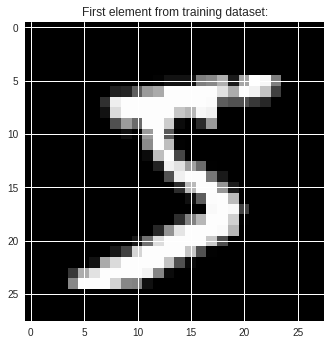

In [3]:
# Load data:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display first element from (X_train, y_train):
plt.title("First element from training dataset:")
plt.imshow(X_train[0], cmap="gray")
print("First label from training dataset: {}".format(y_train[0]))

### Preprocess dataset:

In [4]:
# Reshape to be [samples][pixels][width][height]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalize inputs from 0-255 to 0-1:
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs: 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Let's checkout changes:
print("New dimensions of first element in training set: {}".format(X_train[0].shape))
print("New label of first element in training set: {}".format(y_train[0]))

New dimensions of first element in training set: (1, 28, 28)
New label of first element in training set: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Let's talk about the model...

We will be using a model based in the LeNet-5, which is a CNN with the following architecture:

<center>
    <img src="https://raw.githubusercontent.com/RodolfoFerro/CONISOFT2018/master/assets/LeNet-5.png" width="70%"><br>
    <span style="font-size:0.5em;">Source: ([*"Gradient-Based Learning Applied to Document Recognition", LeCunn et. al, 1998*](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf))</span>
</center>

### Our architecture:

<span style="font-size:0.8em;">Created with: [*"convnet-drawer"*, see GitHub repo.](https://github.com/yu4u/convnet-drawer)</span>

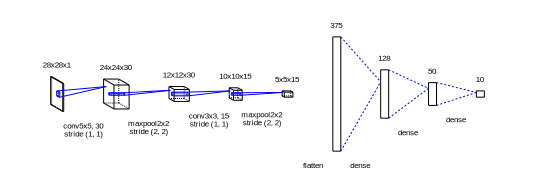

In [5]:
from IPython.display import SVG
def show_svg():
    return SVG(url='data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHhtbG5zOnhsaW5rPSJodHRw%0D%0AOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIiB3aWR0aD0gIjUzNS4wNTIwNjcyNzA3OTMiIGhlaWdo%0D%0AdD0iMTk2LjYxMDY2MDE4NjE4NDkzIiB2aWV3Qm94PSItNTAgLTk0LjMwNTMzMDA5MzA5MjQ2IDUz%0D%0ANS4wNTIwNjcyNzA3OTMgMTk2LjYxMDY2MDE4NjE4NDkzIj4KPGxpbmUgeDE9IjAiIHkxPSIxMC41%0D%0AIiB4Mj0iMCIgeTI9Ii0xNy41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5v%0D%0AbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxLjAiIHkxPSIxMC41IiB4Mj0i%0D%0AMS4wIiB5Mj0iLTE3LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMSIgc3Ry%0D%0Ab2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjEyLjEyNDM1NTY1Mjk4MjE0MyIgeTE9IjE3%0D%0ALjUiIHgyPSIxMi4xMjQzNTU2NTI5ODIxNDMiIHkyPSItMTAuNSIgc3Ryb2tlLXdpZHRoPSIxIiBz%0D%0AdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0i%0D%0AMTMuMTI0MzU1NjUyOTgyMTQzIiB5MT0iMTcuNSIgeDI9IjEzLjEyNDM1NTY1Mjk4MjE0MyIgeTI9%0D%0AIi0xMC41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0i%0D%0AcmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIwIiB5MT0iMTAuNSIgeDI9IjEyLjEyNDM1NTY1Mjk4%0D%0AMjE0MyIgeTI9IjE3LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjAiIHkxPSItMTcuNSIgeDI9IjEyLjEy%0D%0ANDM1NTY1Mjk4MjE0MyIgeTI9Ii0xMC41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJy%0D%0AYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxLjAiIHkxPSIxMC41%0D%0AIiB4Mj0iMTMuMTI0MzU1NjUyOTgyMTQzIiB5Mj0iMTcuNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJv%0D%0Aa2UtZGFzaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMS4wIiB5%0D%0AMT0iLTE3LjUiIHgyPSIxMy4xMjQzNTU2NTI5ODIxNDMiIHkyPSItMTAuNSIgc3Ryb2tlLXdpZHRo%0D%0APSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGlu%0D%0AZSB4MT0iMCIgeTE9IjEwLjUiIHgyPSIxLjAiIHkyPSIxMC41IiBzdHJva2Utd2lkdGg9IjEiIHN0%0D%0Acm9rZS1kYXNoYXJyYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxMi4x%0D%0AMjQzNTU2NTI5ODIxNDMiIHkxPSIxNy41IiB4Mj0iMTMuMTI0MzU1NjUyOTgyMTQzIiB5Mj0iMTcu%0D%0ANSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigw%0D%0ALCAwLCAwKSIvPgo8bGluZSB4MT0iMCIgeTE9Ii0xNy41IiB4Mj0iMS4wIiB5Mj0iLTE3LjUiIHN0%0D%0Acm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwg%0D%0AMCkiLz4KPGxpbmUgeDE9IjEyLjEyNDM1NTY1Mjk4MjE0MyIgeTE9Ii0xMC41IiB4Mj0iMTMuMTI0%0D%0AMzU1NjUyOTgyMTQzIiB5Mj0iLTEwLjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJh%0D%0AeT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPHRleHQgeD0iNi41NjIxNzc4MjY0OTEw%0D%0ANzEiIHk9Ii0yNi41IiBmb250LWZhbWlseT0iYXJpYWwiIGZvbnQtc2l6ZT0iOHB4IiB0ZXh0LWFu%0D%0AY2hvcj0ibWlkZGxlIiBmaWxsPSJyZ2IoMCwgMCwgMCkiPjI4eDI4eDE8L3RleHQ+CjxsaW5lIHgx%0D%0APSI1My4xMjQzNTU2NTI5ODIxNDYiIHkxPSI5LjAiIHgyPSI1My4xMjQzNTU2NTI5ODIxNDYiIHky%0D%0APSItMTUuMCIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9%0D%0AInJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iNjguMzE5MjI2MTc2MzQ1NyIgeTE9IjkuMCIgeDI9%0D%0AIjY4LjMxOTIyNjE3NjM0NTciIHkyPSItMTUuMCIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFz%0D%0AaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iNjMuNTE2NjYwNDk4%0D%0AMzk1NDEiIHkxPSIxNS4wIiB4Mj0iNjMuNTE2NjYwNDk4Mzk1NDEiIHkyPSItOS4wIiBzdHJva2Ut%0D%0Ad2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+%0D%0ACjxsaW5lIHgxPSI3OC43MTE1MzEwMjE3NTg5NiIgeTE9IjE1LjAiIHgyPSI3OC43MTE1MzEwMjE3%0D%0ANTg5NiIgeTI9Ii05LjAiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjUzLjEyNDM1NTY1Mjk4MjE0NiIgeTE9%0D%0AIjkuMCIgeDI9IjYzLjUxNjY2MDQ5ODM5NTQxIiB5Mj0iMTUuMCIgc3Ryb2tlLXdpZHRoPSIxIiBz%0D%0AdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0i%0D%0ANTMuMTI0MzU1NjUyOTgyMTQ2IiB5MT0iLTE1LjAiIHgyPSI2My41MTY2NjA0OTgzOTU0MSIgeTI9%0D%0AIi05LjAiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJy%0D%0AZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjY4LjMxOTIyNjE3NjM0NTciIHkxPSI5LjAiIHgyPSI3%0D%0AOC43MTE1MzEwMjE3NTg5NiIgeTI9IjE1LjAiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hh%0D%0AcnJheT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjY4LjMxOTIyNjE3NjM0%0D%0ANTciIHkxPSItMTUuMCIgeDI9Ijc4LjcxMTUzMTAyMTc1ODk2IiB5Mj0iLTkuMCIgc3Ryb2tlLXdp%0D%0AZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8%0D%0AbGluZSB4MT0iNTMuMTI0MzU1NjUyOTgyMTQ2IiB5MT0iOS4wIiB4Mj0iNjguMzE5MjI2MTc2MzQ1%0D%0ANyIgeTI9IjkuMCIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIxIiBzdHJva2U9%0D%0AInJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iNjMuNTE2NjYwNDk4Mzk1NDEiIHkxPSIxNS4wIiB4%0D%0AMj0iNzguNzExNTMxMDIxNzU4OTYiIHkyPSIxNS4wIiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1k%0D%0AYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSI1My4xMjQz%0D%0ANTU2NTI5ODIxNDYiIHkxPSItMTUuMCIgeDI9IjY4LjMxOTIyNjE3NjM0NTciIHkyPSItMTUuMCIg%0D%0Ac3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAw%0D%0ALCAwKSIvPgo8bGluZSB4MT0iNjMuNTE2NjYwNDk4Mzk1NDEiIHkxPSItOS4wIiB4Mj0iNzguNzEx%0D%0ANTMxMDIxNzU4OTYiIHkyPSItOS4wIiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9%0D%0AIm5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+Cjx0ZXh0IHg9IjY1LjkxNzk0MzMzNzM3MDU2%0D%0AIiB5PSItMjQuMCIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIgdGV4dC1hbmNo%0D%0Ab3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj4yNHgyNHgzMDwvdGV4dD4KPGxpbmUgeDE9%0D%0AIjExOC43MTE1MzEwMjE3NTg5NiIgeTE9IjQuNSIgeDI9IjExOC43MTE1MzEwMjE3NTg5NiIgeTI9%0D%0AIi03LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJy%0D%0AZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjEzMy45MDY0MDE1NDUxMjI1IiB5MT0iNC41IiB4Mj0i%0D%0AMTMzLjkwNjQwMTU0NTEyMjUiIHkyPSItNy41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNo%0D%0AYXJyYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxMjMuOTA3NjgzNDQ0%0D%0ANDY1NTkiIHkxPSI3LjUiIHgyPSIxMjMuOTA3NjgzNDQ0NDY1NTkiIHkyPSItNC41IiBzdHJva2Ut%0D%0Ad2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+%0D%0ACjxsaW5lIHgxPSIxMzkuMTAyNTUzOTY3ODI5MTIiIHkxPSI3LjUiIHgyPSIxMzkuMTAyNTUzOTY3%0D%0AODI5MTIiIHkyPSItNC41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUi%0D%0AIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxMTguNzExNTMxMDIxNzU4OTYiIHkx%0D%0APSI0LjUiIHgyPSIxMjMuOTA3NjgzNDQ0NDY1NTkiIHkyPSI3LjUiIHN0cm9rZS13aWR0aD0iMSIg%0D%0Ac3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9%0D%0AIjExOC43MTE1MzEwMjE3NTg5NiIgeTE9Ii03LjUiIHgyPSIxMjMuOTA3NjgzNDQ0NDY1NTkiIHky%0D%0APSItNC41IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0i%0D%0AcmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxMzMuOTA2NDAxNTQ1MTIyNSIgeTE9IjQuNSIgeDI9%0D%0AIjEzOS4xMDI1NTM5Njc4MjkxMiIgeTI9IjcuNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFz%0D%0AaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMTMzLjkwNjQwMTU0%0D%0ANTEyMjUiIHkxPSItNy41IiB4Mj0iMTM5LjEwMjU1Mzk2NzgyOTEyIiB5Mj0iLTQuNSIgc3Ryb2tl%0D%0ALXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIv%0D%0APgo8bGluZSB4MT0iMTE4LjcxMTUzMTAyMTc1ODk2IiB5MT0iNC41IiB4Mj0iMTMzLjkwNjQwMTU0%0D%0ANTEyMjUiIHkyPSI0LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMSIgc3Ry%0D%0Ab2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjEyMy45MDc2ODM0NDQ0NjU1OSIgeTE9Ijcu%0D%0ANSIgeDI9IjEzOS4xMDI1NTM5Njc4MjkxMiIgeTI9IjcuNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJv%0D%0Aa2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMTE4%0D%0ALjcxMTUzMTAyMTc1ODk2IiB5MT0iLTcuNSIgeDI9IjEzMy45MDY0MDE1NDUxMjI1IiB5Mj0iLTcu%0D%0ANSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigw%0D%0ALCAwLCAwKSIvPgo8bGluZSB4MT0iMTIzLjkwNzY4MzQ0NDQ2NTU5IiB5MT0iLTQuNSIgeDI9IjEz%0D%0AOS4xMDI1NTM5Njc4MjkxMiIgeTI9Ii00LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hh%0D%0AcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPHRleHQgeD0iMTI4LjkwNzA0MjQ5%0D%0ANDc5NDA0IiB5PSItMTYuNSIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIgdGV4%0D%0AdC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj4xMngxMngzMDwvdGV4dD4KPGxp%0D%0AbmUgeDE9IjE3OS4xMDI1NTM5Njc4MjkxMiIgeTE9IjMuNzUiIHgyPSIxNzkuMTAyNTUzOTY3ODI5%0D%0AMTIiIHkyPSItNi4yNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBz%0D%0AdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMTg3LjgyOTcxNTM1NTExOTQ1IiB5MT0i%0D%0AMy43NSIgeDI9IjE4Ny44Mjk3MTUzNTUxMTk0NSIgeTI9Ii02LjI1IiBzdHJva2Utd2lkdGg9IjEi%0D%0AIHN0cm9rZS1kYXNoYXJyYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIx%0D%0AODMuNDMyNjgwOTg2NzUxMyIgeTE9IjYuMjUiIHgyPSIxODMuNDMyNjgwOTg2NzUxMyIgeTI9Ii0z%0D%0ALjc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdi%0D%0AKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxOTIuMTU5ODQyMzc0MDQxNjMiIHkxPSI2LjI1IiB4Mj0i%0D%0AMTkyLjE1OTg0MjM3NDA0MTYzIiB5Mj0iLTMuNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRh%0D%0Ac2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjE3OS4xMDI1%0D%0ANTM5Njc4MjkxMiIgeTE9IjMuNzUiIHgyPSIxODMuNDMyNjgwOTg2NzUxMyIgeTI9IjYuMjUiIHN0%0D%0Acm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwg%0D%0AMCkiLz4KPGxpbmUgeDE9IjE3OS4xMDI1NTM5Njc4MjkxMiIgeTE9Ii02LjI1IiB4Mj0iMTgzLjQz%0D%0AMjY4MDk4Njc1MTMiIHkyPSItMy43NSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5%0D%0APSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMTg3LjgyOTcxNTM1NTEx%0D%0AOTQ1IiB5MT0iMy43NSIgeDI9IjE5Mi4xNTk4NDIzNzQwNDE2MyIgeTI9IjYuMjUiIHN0cm9rZS13%0D%0AaWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxp%0D%0AbmUgeDE9IjE4Ny44Mjk3MTUzNTUxMTk0NSIgeTE9Ii02LjI1IiB4Mj0iMTkyLjE1OTg0MjM3NDA0%0D%0AMTYzIiB5Mj0iLTMuNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjE3OS4xMDI1NTM5Njc4MjkxMiIgeTE9%0D%0AIjMuNzUiIHgyPSIxODcuODI5NzE1MzU1MTE5NDUiIHkyPSIzLjc1IiBzdHJva2Utd2lkdGg9IjEi%0D%0AIHN0cm9rZS1kYXNoYXJyYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIx%0D%0AODMuNDMyNjgwOTg2NzUxMyIgeTE9IjYuMjUiIHgyPSIxOTIuMTU5ODQyMzc0MDQxNjMiIHkyPSI2%0D%0ALjI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdi%0D%0AKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxNzkuMTAyNTUzOTY3ODI5MTIiIHkxPSItNi4yNSIgeDI9%0D%0AIjE4Ny44Mjk3MTUzNTUxMTk0NSIgeTI9Ii02LjI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1k%0D%0AYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIxODMuNDMy%0D%0ANjgwOTg2NzUxMyIgeTE9Ii0zLjc1IiB4Mj0iMTkyLjE1OTg0MjM3NDA0MTYzIiB5Mj0iLTMuNzUi%0D%0AIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwg%0D%0AMCwgMCkiLz4KPHRleHQgeD0iMTg1LjYzMTE5ODE3MDkzNTM2IiB5PSItMTUuMjUiIGZvbnQtZmFt%0D%0AaWx5PSJhcmlhbCIgZm9udC1zaXplPSI4cHgiIHRleHQtYW5jaG9yPSJtaWRkbGUiIGZpbGw9InJn%0D%0AYigwLCAwLCAwKSI+MTB4MTB4MTU8L3RleHQ+CjxsaW5lIHgxPSIyMzIuMTU5ODQyMzc0MDQxNjMi%0D%0AIHkxPSIxLjg3NSIgeDI9IjIzMi4xNTk4NDIzNzQwNDE2MyIgeTI9Ii0zLjEyNSIgc3Ryb2tlLXdp%0D%0AZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8%0D%0AbGluZSB4MT0iMjQwLjg4NzAwMzc2MTMzMTk1IiB5MT0iMS44NzUiIHgyPSIyNDAuODg3MDAzNzYx%0D%0AMzMxOTUiIHkyPSItMy4xMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjIzNC4zMjQ5MDU4ODM1MDI3NCIgeTE9%0D%0AIjMuMTI1IiB4Mj0iMjM0LjMyNDkwNTg4MzUwMjc0IiB5Mj0iLTEuODc1IiBzdHJva2Utd2lkdGg9%0D%0AIjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5l%0D%0AIHgxPSIyNDMuMDUyMDY3MjcwNzkzMDYiIHkxPSIzLjEyNSIgeDI9IjI0My4wNTIwNjcyNzA3OTMw%0D%0ANiIgeTI9Ii0xLjg3NSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBz%0D%0AdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMjMyLjE1OTg0MjM3NDA0MTYzIiB5MT0i%0D%0AMS44NzUiIHgyPSIyMzQuMzI0OTA1ODgzNTAyNzQiIHkyPSIzLjEyNSIgc3Ryb2tlLXdpZHRoPSIx%0D%0AIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4%0D%0AMT0iMjMyLjE1OTg0MjM3NDA0MTYzIiB5MT0iLTMuMTI1IiB4Mj0iMjM0LjMyNDkwNTg4MzUwMjc0%0D%0AIiB5Mj0iLTEuODc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0%0D%0Acm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIyNDAuODg3MDAzNzYxMzMxOTUiIHkxPSIx%0D%0ALjg3NSIgeDI9IjI0My4wNTIwNjcyNzA3OTMwNiIgeTI9IjMuMTI1IiBzdHJva2Utd2lkdGg9IjEi%0D%0AIHN0cm9rZS1kYXNoYXJyYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIy%0D%0ANDAuODg3MDAzNzYxMzMxOTUiIHkxPSItMy4xMjUiIHgyPSIyNDMuMDUyMDY3MjcwNzkzMDYiIHky%0D%0APSItMS44NzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tl%0D%0APSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjIzMi4xNTk4NDIzNzQwNDE2MyIgeTE9IjEuODc1%0D%0AIiB4Mj0iMjQwLjg4NzAwMzc2MTMzMTk1IiB5Mj0iMS44NzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ry%0D%0Ab2tlLWRhc2hhcnJheT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjIzNC4z%0D%0AMjQ5MDU4ODM1MDI3NCIgeTE9IjMuMTI1IiB4Mj0iMjQzLjA1MjA2NzI3MDc5MzA2IiB5Mj0iMy4x%0D%0AMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2Io%0D%0AMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjIzMi4xNTk4NDIzNzQwNDE2MyIgeTE9Ii0zLjEyNSIgeDI9%0D%0AIjI0MC44ODcwMDM3NjEzMzE5NSIgeTI9Ii0zLjEyNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2Ut%0D%0AZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMjM0LjMy%0D%0ANDkwNTg4MzUwMjc0IiB5MT0iLTEuODc1IiB4Mj0iMjQzLjA1MjA2NzI3MDc5MzA2IiB5Mj0iLTEu%0D%0AODc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdi%0D%0AKDAsIDAsIDApIi8+Cjx0ZXh0IHg9IjIzNy42MDU5NTQ4MjI0MTczNSIgeT0iLTEyLjEyNSIgZm9u%0D%0AdC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmls%0D%0AbD0icmdiKDAsIDAsIDApIj41eDV4MTU8L3RleHQ+CjxsaW5lIHgxPSIyODMuMDUyMDY3MjcwNzkz%0D%0AMDMiIHkxPSItNTcuMzA1MzMwMDkzMDkyNDciIHgyPSIyODMuMDUyMDY3MjcwNzkzMDMiIHkyPSI1%0D%0ANy4zMDUzMzAwOTMwOTI0NyIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25l%0D%0AIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMjgzLjA1MjA2NzI3MDc5MzAzIiB5%0D%0AMT0iNTcuMzA1MzMwMDkzMDkyNDciIHgyPSIyOTEuMDUyMDY3MjcwNzkzMDMiIHkyPSI1Ny4zMDUz%0D%0AMzAwOTMwOTI0NyIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJv%0D%0Aa2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMjkxLjA1MjA2NzI3MDc5MzAzIiB5MT0iNTcu%0D%0AMzA1MzMwMDkzMDkyNDciIHgyPSIyOTEuMDUyMDY3MjcwNzkzMDMiIHkyPSItNTcuMzA1MzMwMDkz%0D%0AMDkyNDciIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJy%0D%0AZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjI5MS4wNTIwNjcyNzA3OTMwMyIgeTE9Ii01Ny4zMDUz%0D%0AMzAwOTMwOTI0NyIgeDI9IjI4My4wNTIwNjcyNzA3OTMwMyIgeTI9Ii01Ny4zMDUzMzAwOTMwOTI0%0D%0ANyIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigw%0D%0ALCAwLCAwKSIvPgo8dGV4dCB4PSIyODcuMDUyMDY3MjcwNzkzMDMiIHk9Ii02Ni4zMDUzMzAwOTMw%0D%0AOTI0NiIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1p%0D%0AZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj4zNzU8L3RleHQ+CjxsaW5lIHgxPSIzMzEuMDUyMDY3%0D%0AMjcwNzkzMDMiIHkxPSItMjQuMjUxNDY1MDY0MTY2Mzc1IiB4Mj0iMzMxLjA1MjA2NzI3MDc5MzAz%0D%0AIiB5Mj0iMjQuMjUxNDY1MDY0MTY2Mzc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJy%0D%0AYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+CjxsaW5lIHgxPSIzMzEuMDUyMDY3Mjcw%0D%0ANzkzMDMiIHkxPSIyNC4yNTE0NjUwNjQxNjYzNzUiIHgyPSIzMzkuMDUyMDY3MjcwNzkzMDMiIHky%0D%0APSIyNC4yNTE0NjUwNjQxNjYzNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0i%0D%0Abm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjMzOS4wNTIwNjcyNzA3OTMw%0D%0AMyIgeTE9IjI0LjI1MTQ2NTA2NDE2NjM3NSIgeDI9IjMzOS4wNTIwNjcyNzA3OTMwMyIgeTI9Ii0y%0D%0ANC4yNTE0NjUwNjQxNjYzNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9u%0D%0AZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjMzOS4wNTIwNjcyNzA3OTMwMyIg%0D%0AeTE9Ii0yNC4yNTE0NjUwNjQxNjYzNzUiIHgyPSIzMzEuMDUyMDY3MjcwNzkzMDMiIHkyPSItMjQu%0D%0AMjUxNDY1MDY0MTY2Mzc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUi%0D%0AIHN0cm9rZT0icmdiKDAsIDAsIDApIi8+Cjx0ZXh0IHg9IjMzNS4wNTIwNjcyNzA3OTMwMyIgeT0i%0D%0ALTMzLjI1MTQ2NTA2NDE2NjM3NSIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIg%0D%0AdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj4xMjg8L3RleHQ+CjxsaW5l%0D%0AIHgxPSIzNzkuMDUyMDY3MjcwNzkzMDMiIHkxPSItMTEuNDMyNjI2Mjk4MTgzMTYiIHgyPSIzNzku%0D%0AMDUyMDY3MjcwNzkzMDMiIHkyPSIxMS40MzI2MjYyOTgxODMxNiIgc3Ryb2tlLXdpZHRoPSIxIiBz%0D%0AdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0i%0D%0AMzc5LjA1MjA2NzI3MDc5MzAzIiB5MT0iMTEuNDMyNjI2Mjk4MTgzMTYiIHgyPSIzODcuMDUyMDY3%0D%0AMjcwNzkzMDMiIHkyPSIxMS40MzI2MjYyOTgxODMxNiIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2Ut%0D%0AZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0iMzg3LjA1%0D%0AMjA2NzI3MDc5MzAzIiB5MT0iMTEuNDMyNjI2Mjk4MTgzMTYiIHgyPSIzODcuMDUyMDY3MjcwNzkz%0D%0AMDMiIHkyPSItMTEuNDMyNjI2Mjk4MTgzMTYiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hh%0D%0AcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxpbmUgeDE9IjM4Ny4wNTIwNjcy%0D%0ANzA3OTMwMyIgeTE9Ii0xMS40MzI2MjYyOTgxODMxNiIgeDI9IjM3OS4wNTIwNjcyNzA3OTMwMyIg%0D%0AeTI9Ii0xMS40MzI2MjYyOTgxODMxNiIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5%0D%0APSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8dGV4dCB4PSIzODMuMDUyMDY3MjcwNzkz%0D%0AMDMiIHk9Ii0yMC40MzI2MjYyOTgxODMxNiIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNpemU9%0D%0AIjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj41MDwvdGV4dD4K%0D%0APGxpbmUgeDE9IjQyNy4wNTIwNjcyNzA3OTMwMyIgeTE9Ii0zLjE1NDc4NjcyMjQwMDk2NjciIHgy%0D%0APSI0MjcuMDUyMDY3MjcwNzkzMDMiIHkyPSIzLjE1NDc4NjcyMjQwMDk2NjciIHN0cm9rZS13aWR0%0D%0AaD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPGxp%0D%0AbmUgeDE9IjQyNy4wNTIwNjcyNzA3OTMwMyIgeTE9IjMuMTU0Nzg2NzIyNDAwOTY2NyIgeDI9IjQz%0D%0ANS4wNTIwNjcyNzA3OTMwMyIgeTI9IjMuMTU0Nzg2NzIyNDAwOTY2NyIgc3Ryb2tlLXdpZHRoPSIx%0D%0AIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4%0D%0AMT0iNDM1LjA1MjA2NzI3MDc5MzAzIiB5MT0iMy4xNTQ3ODY3MjI0MDA5NjY3IiB4Mj0iNDM1LjA1%0D%0AMjA2NzI3MDc5MzAzIiB5Mj0iLTMuMTU0Nzg2NzIyNDAwOTY2NyIgc3Ryb2tlLXdpZHRoPSIxIiBz%0D%0AdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAwKSIvPgo8bGluZSB4MT0i%0D%0ANDM1LjA1MjA2NzI3MDc5MzAzIiB5MT0iLTMuMTU0Nzg2NzIyNDAwOTY2NyIgeDI9IjQyNy4wNTIw%0D%0ANjcyNzA3OTMwMyIgeTI9Ii0zLjE1NDc4NjcyMjQwMDk2NjciIHN0cm9rZS13aWR0aD0iMSIgc3Ry%0D%0Ab2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMCkiLz4KPHRleHQgeD0iNDMx%0D%0ALjA1MjA2NzI3MDc5MzAzIiB5PSItMTIuMTU0Nzg2NzIyNDAwOTY3IiBmb250LWZhbWlseT0iYXJp%0D%0AYWwiIGZvbnQtc2l6ZT0iOHB4IiB0ZXh0LWFuY2hvcj0ibWlkZGxlIiBmaWxsPSJyZ2IoMCwgMCwg%0D%0AMCkiPjEwPC90ZXh0Pgo8bGluZSB4MT0iNi4wNjIxNzc4MjY0OTEwNzEiIHkxPSIxLjg3NSIgeDI9%0D%0AIjYuMDYyMTc3ODI2NDkxMDcxIiB5Mj0iLTMuMTI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1k%0D%0AYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjcuMDYy%0D%0AMTc3ODI2NDkxMDcxIiB5MT0iMS44NzUiIHgyPSI3LjA2MjE3NzgyNjQ5MTA3MSIgeTI9Ii0zLjEy%0D%0ANSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAw%0D%0ALCAyNTUpIi8+CjxsaW5lIHgxPSI4LjIyNzI0MTMzNTk1MjE2OSIgeTE9IjMuMTI1IiB4Mj0iOC4y%0D%0AMjcyNDEzMzU5NTIxNjkiIHkyPSItMS44NzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hh%0D%0AcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iOS4yMjcyNDEz%0D%0AMzU5NTIxNjkiIHkxPSIzLjEyNSIgeDI9IjkuMjI3MjQxMzM1OTUyMTY5IiB5Mj0iLTEuODc1IiBz%0D%0AdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAs%0D%0AIDI1NSkiLz4KPGxpbmUgeDE9IjYuMDYyMTc3ODI2NDkxMDcxIiB5MT0iMS44NzUiIHgyPSI4LjIy%0D%0ANzI0MTMzNTk1MjE2OSIgeTI9IjMuMTI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJy%0D%0AYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjYuMDYyMTc3ODI2%0D%0ANDkxMDcxIiB5MT0iLTMuMTI1IiB4Mj0iOC4yMjcyNDEzMzU5NTIxNjkiIHkyPSItMS44NzUiIHN0%0D%0Acm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwg%0D%0AMjU1KSIvPgo8bGluZSB4MT0iNy4wNjIxNzc4MjY0OTEwNzEiIHkxPSIxLjg3NSIgeDI9IjkuMjI3%0D%0AMjQxMzM1OTUyMTY5IiB5Mj0iMy4xMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJh%0D%0AeT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iNy4wNjIxNzc4MjY0OTEw%0D%0ANzEiIHkxPSItMy4xMjUiIHgyPSI5LjIyNzI0MTMzNTk1MjE2OSIgeTI9Ii0xLjg3NSIgc3Ryb2tl%0D%0ALXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUp%0D%0AIi8+CjxsaW5lIHgxPSI2LjA2MjE3NzgyNjQ5MTA3MSIgeTE9IjEuODc1IiB4Mj0iNy4wNjIxNzc4%0D%0AMjY0OTEwNzEiIHkyPSIxLjg3NSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIx%0D%0AIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSI4LjIyNzI0MTMzNTk1MjE2OSIg%0D%0AeTE9IjMuMTI1IiB4Mj0iOS4yMjcyNDEzMzU5NTIxNjkiIHkyPSIzLjEyNSIgc3Ryb2tlLXdpZHRo%0D%0APSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+Cjxs%0D%0AaW5lIHgxPSI2LjA2MjE3NzgyNjQ5MTA3MSIgeTE9Ii0zLjEyNSIgeDI9IjcuMDYyMTc3ODI2NDkx%0D%0AMDcxIiB5Mj0iLTMuMTI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUi%0D%0AIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjguMjI3MjQxMzM1OTUyMTY5IiB5%0D%0AMT0iLTEuODc1IiB4Mj0iOS4yMjcyNDEzMzU5NTIxNjkiIHkyPSItMS44NzUiIHN0cm9rZS13aWR0%0D%0AaD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8%0D%0AbGluZSB4MT0iNy4wNjIxNzc4MjY0OTEwNzEiIHkxPSItMy4xMjUiIHgyPSI1NS43MjI0MzE4NjQz%0D%0AMzU0NiIgeTI9Ii03LjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iOS4yMjcyNDEzMzU5NTIxNjkiIHkx%0D%0APSIzLjEyNSIgeDI9IjU1LjcyMjQzMTg2NDMzNTQ2IiB5Mj0iLTcuNSIgc3Ryb2tlLXdpZHRoPSIx%0D%0AIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+Cjx0ZXh0%0D%0AIHg9IjMzLjEyNDM1NTY1Mjk4MjE0NiIgeT0iMzQuNSIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250%0D%0ALXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj5jb252%0D%0ANXg1LCAzMDwvdGV4dD4KPHRleHQgeD0iMzMuMTI0MzU1NjUyOTgyMTQ2IiB5PSI0Mi41IiBmb250%0D%0ALWZhbWlseT0iYXJpYWwiIGZvbnQtc2l6ZT0iOHB4IiB0ZXh0LWFuY2hvcj0ibWlkZGxlIiBmaWxs%0D%0APSJyZ2IoMCwgMCwgMCkiPnN0cmlkZSAoMSwgMSk8L3RleHQ+CjxsaW5lIHgxPSI1OC4zMjA1MDgw%0D%0ANzU2ODg3OCIgeTE9IjAuNzUiIHgyPSI1OC4zMjA1MDgwNzU2ODg3OCIgeTI9Ii0xLjI1IiBzdHJv%0D%0Aa2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1%0D%0ANSkiLz4KPGxpbmUgeDE9IjczLjUxNTM3ODU5OTA1MjMzIiB5MT0iMC43NSIgeDI9IjczLjUxNTM3%0D%0AODU5OTA1MjMzIiB5Mj0iLTEuMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0i%0D%0AMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iNTkuMTg2NTMzNDc5NDczMjIi%0D%0AIHkxPSIxLjI1IiB4Mj0iNTkuMTg2NTMzNDc5NDczMjIiIHkyPSItMC43NSIgc3Ryb2tlLXdpZHRo%0D%0APSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+Cjxs%0D%0AaW5lIHgxPSI3NC4zODE0MDQwMDI4MzY3NiIgeTE9IjEuMjUiIHgyPSI3NC4zODE0MDQwMDI4MzY3%0D%0ANiIgeTI9Ii0wLjc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0%0D%0Acm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjU4LjMyMDUwODA3NTY4ODc4IiB5MT0i%0D%0AMC43NSIgeDI9IjU5LjE4NjUzMzQ3OTQ3MzIyIiB5Mj0iMS4yNSIgc3Ryb2tlLXdpZHRoPSIxIiBz%0D%0AdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgx%0D%0APSI1OC4zMjA1MDgwNzU2ODg3OCIgeTE9Ii0xLjI1IiB4Mj0iNTkuMTg2NTMzNDc5NDczMjIiIHky%0D%0APSItMC43NSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9%0D%0AInJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSI3My41MTUzNzg1OTkwNTIzMyIgeTE9IjAuNzUi%0D%0AIHgyPSI3NC4zODE0MDQwMDI4MzY3NiIgeTI9IjEuMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tl%0D%0ALWRhc2hhcnJheT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iNzMuNTE1%0D%0AMzc4NTk5MDUyMzMiIHkxPSItMS4yNSIgeDI9Ijc0LjM4MTQwNDAwMjgzNjc2IiB5Mj0iLTAuNzUi%0D%0AIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwg%0D%0AMCwgMjU1KSIvPgo8bGluZSB4MT0iNTguMzIwNTA4MDc1Njg4NzgiIHkxPSIwLjc1IiB4Mj0iNzMu%0D%0ANTE1Mzc4NTk5MDUyMzMiIHkyPSIwLjc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJy%0D%0AYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjU5LjE4NjUzMzQ3OTQ3%0D%0AMzIyIiB5MT0iMS4yNSIgeDI9Ijc0LjM4MTQwNDAwMjgzNjc2IiB5Mj0iMS4yNSIgc3Ryb2tlLXdp%0D%0AZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+%0D%0ACjxsaW5lIHgxPSI1OC4zMjA1MDgwNzU2ODg3OCIgeTE9Ii0xLjI1IiB4Mj0iNzMuNTE1Mzc4NTk5%0D%0AMDUyMzMiIHkyPSItMS4yNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25l%0D%0AIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSI1OS4xODY1MzM0Nzk0NzMyMiIg%0D%0AeTE9Ii0wLjc1IiB4Mj0iNzQuMzgxNDA0MDAyODM2NzYiIHkyPSItMC43NSIgc3Ryb2tlLXdpZHRo%0D%0APSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+Cjxs%0D%0AaW5lIHgxPSI3My41MTUzNzg1OTkwNTIzMyIgeTE9Ii0xLjI1IiB4Mj0iMTIwLjAxMDU2OTEyNzQz%0D%0ANTYyIiB5Mj0iLTMuNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iNzQuMzgxNDA0MDAyODM2NzYiIHkx%0D%0APSIxLjI1IiB4Mj0iMTIwLjAxMDU2OTEyNzQzNTYyIiB5Mj0iLTMuNzUiIHN0cm9rZS13aWR0aD0i%0D%0AMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8dGV4%0D%0AdCB4PSI5OC43MTE1MzEwMjE3NTg5NiIgeT0iMzIuMCIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250%0D%0ALXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj5tYXhw%0D%0Ab29sMngyPC90ZXh0Pgo8dGV4dCB4PSI5OC43MTE1MzEwMjE3NTg5NiIgeT0iNDAuMCIgZm9udC1m%0D%0AYW1pbHk9ImFyaWFsIiBmb250LXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0i%0D%0AcmdiKDAsIDAsIDApIj5zdHJpZGUgKDIsIDIpPC90ZXh0Pgo8bGluZSB4MT0iMTIxLjMwOTYwNzIz%0D%0AMzExMjI3IiB5MT0iMS4xMjUiIHgyPSIxMjEuMzA5NjA3MjMzMTEyMjciIHkyPSItMS44NzUiIHN0%0D%0Acm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwg%0D%0AMjU1KSIvPgo8bGluZSB4MT0iMTM2LjUwNDQ3Nzc1NjQ3NTgiIHkxPSIxLjEyNSIgeDI9IjEzNi41%0D%0AMDQ0Nzc3NTY0NzU4IiB5Mj0iLTEuODc1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJy%0D%0AYXk9IjEiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjEyMi42MDg2NDUzMzg3%0D%0AODg5MyIgeTE9IjEuODc1IiB4Mj0iMTIyLjYwODY0NTMzODc4ODkzIiB5Mj0iLTEuMTI1IiBzdHJv%0D%0Aa2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1%0D%0ANSkiLz4KPGxpbmUgeDE9IjEzNy44MDM1MTU4NjIxNTI1IiB5MT0iMS44NzUiIHgyPSIxMzcuODAz%0D%0ANTE1ODYyMTUyNSIgeTI9Ii0xLjEyNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5%0D%0APSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSIxMjEuMzA5NjA3MjMz%0D%0AMTEyMjciIHkxPSIxLjEyNSIgeDI9IjEyMi42MDg2NDUzMzg3ODg5MyIgeTI9IjEuODc1IiBzdHJv%0D%0Aa2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1%0D%0ANSkiLz4KPGxpbmUgeDE9IjEyMS4zMDk2MDcyMzMxMTIyNyIgeTE9Ii0xLjg3NSIgeDI9IjEyMi42%0D%0AMDg2NDUzMzg3ODg5MyIgeTI9Ii0xLjEyNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFy%0D%0AcmF5PSJub25lIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSIxMzYuNTA0NDc3%0D%0ANzU2NDc1OCIgeTE9IjEuMTI1IiB4Mj0iMTM3LjgwMzUxNTg2MjE1MjUiIHkyPSIxLjg3NSIgc3Ry%0D%0Ab2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAwLCAyNTUp%0D%0AIi8+CjxsaW5lIHgxPSIxMzYuNTA0NDc3NzU2NDc1OCIgeTE9Ii0xLjg3NSIgeDI9IjEzNy44MDM1%0D%0AMTU4NjIxNTI1IiB5Mj0iLTEuMTI1IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9%0D%0AIm5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjEyMS4zMDk2MDcyMzMx%0D%0AMTIyNyIgeTE9IjEuMTI1IiB4Mj0iMTM2LjUwNDQ3Nzc1NjQ3NTgiIHkyPSIxLjEyNSIgc3Ryb2tl%0D%0ALXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIxIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+%0D%0ACjxsaW5lIHgxPSIxMjIuNjA4NjQ1MzM4Nzg4OTMiIHkxPSIxLjg3NSIgeDI9IjEzNy44MDM1MTU4%0D%0ANjIxNTI1IiB5Mj0iMS44NzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9u%0D%0AZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTIxLjMwOTYwNzIzMzExMjI3%0D%0AIiB5MT0iLTEuODc1IiB4Mj0iMTM2LjUwNDQ3Nzc1NjQ3NTgiIHkyPSItMS44NzUiIHN0cm9rZS13%0D%0AaWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIv%0D%0APgo8bGluZSB4MT0iMTIyLjYwODY0NTMzODc4ODkzIiB5MT0iLTEuMTI1IiB4Mj0iMTM3LjgwMzUx%0D%0ANTg2MjE1MjUiIHkyPSItMS4xMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0i%0D%0Abm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTM2LjUwNDQ3Nzc1NjQ3%0D%0ANTgiIHkxPSItMS44NzUiIHgyPSIxODAuMTg1MDg1NzIyNTU5NjgiIHkyPSItMy4xMjUiIHN0cm9r%0D%0AZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1%0D%0AKSIvPgo8bGluZSB4MT0iMTM3LjgwMzUxNTg2MjE1MjQ3IiB5MT0iMS44NzUiIHgyPSIxODAuMTg1%0D%0AMDg1NzIyNTU5NjgiIHkyPSItMy4xMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJh%0D%0AeT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8dGV4dCB4PSIxNTkuMTAyNTUzOTY3%0D%0AODI5MTIiIHk9IjI0LjUiIGZvbnQtZmFtaWx5PSJhcmlhbCIgZm9udC1zaXplPSI4cHgiIHRleHQt%0D%0AYW5jaG9yPSJtaWRkbGUiIGZpbGw9InJnYigwLCAwLCAwKSI+Y29udjN4MywgMTU8L3RleHQ+Cjx0%0D%0AZXh0IHg9IjE1OS4xMDI1NTM5Njc4MjkxMiIgeT0iMzIuNSIgZm9udC1mYW1pbHk9ImFyaWFsIiBm%0D%0Ab250LXNpemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj5z%0D%0AdHJpZGUgKDEsIDEpPC90ZXh0Pgo8bGluZSB4MT0iMTgxLjI2NzYxNzQ3NzI5MDIzIiB5MT0iMC43%0D%0ANSIgeDI9IjE4MS4yNjc2MTc0NzcyOTAyMyIgeTI9Ii0xLjI1IiBzdHJva2Utd2lkdGg9IjEiIHN0%0D%0Acm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9%0D%0AIjE4OS45OTQ3Nzg4NjQ1ODA1NSIgeTE9IjAuNzUiIHgyPSIxODkuOTk0Nzc4ODY0NTgwNTUiIHky%0D%0APSItMS4yNSIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIxIiBzdHJva2U9InJn%0D%0AYigwLCAwLCAyNTUpIi8+CjxsaW5lIHgxPSIxODIuMTMzNjQyODgxMDc0NjgiIHkxPSIxLjI1IiB4%0D%0AMj0iMTgyLjEzMzY0Mjg4MTA3NDY4IiB5Mj0iLTAuNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tl%0D%0ALWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTkw%0D%0ALjg2MDgwNDI2ODM2NSIgeTE9IjEuMjUiIHgyPSIxOTAuODYwODA0MjY4MzY1IiB5Mj0iLTAuNzUi%0D%0AIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwg%0D%0AMCwgMjU1KSIvPgo8bGluZSB4MT0iMTgxLjI2NzYxNzQ3NzI5MDIzIiB5MT0iMC43NSIgeDI9IjE4%0D%0AMi4xMzM2NDI4ODEwNzQ2OCIgeTI9IjEuMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hh%0D%0AcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTgxLjI2NzYx%0D%0ANzQ3NzI5MDIzIiB5MT0iLTEuMjUiIHgyPSIxODIuMTMzNjQyODgxMDc0NjgiIHkyPSItMC43NSIg%0D%0Ac3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSJub25lIiBzdHJva2U9InJnYigwLCAw%0D%0ALCAyNTUpIi8+CjxsaW5lIHgxPSIxODkuOTk0Nzc4ODY0NTgwNTUiIHkxPSIwLjc1IiB4Mj0iMTkw%0D%0ALjg2MDgwNDI2ODM2NSIgeTI9IjEuMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJh%0D%0AeT0iMSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTg5Ljk5NDc3ODg2NDU4%0D%0AMDU1IiB5MT0iLTEuMjUiIHgyPSIxOTAuODYwODA0MjY4MzY1IiB5Mj0iLTAuNzUiIHN0cm9rZS13%0D%0AaWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIv%0D%0APgo8bGluZSB4MT0iMTgxLjI2NzYxNzQ3NzI5MDIzIiB5MT0iMC43NSIgeDI9IjE4OS45OTQ3Nzg4%0D%0ANjQ1ODA1NSIgeTI9IjAuNzUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMSIg%0D%0Ac3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTgyLjEzMzY0Mjg4MTA3NDY4IiB5%0D%0AMT0iMS4yNSIgeDI9IjE5MC44NjA4MDQyNjgzNjUiIHkyPSIxLjI1IiBzdHJva2Utd2lkdGg9IjEi%0D%0AIHN0cm9rZS1kYXNoYXJyYXk9Im5vbmUiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUg%0D%0AeDE9IjE4MS4yNjc2MTc0NzcyOTAyMyIgeTE9Ii0xLjI1IiB4Mj0iMTg5Ljk5NDc3ODg2NDU4MDU1%0D%0AIiB5Mj0iLTEuMjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ry%0D%0Ab2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTgyLjEzMzY0Mjg4MTA3NDY4IiB5MT0i%0D%0ALTAuNzUiIHgyPSIxOTAuODYwODA0MjY4MzY1IiB5Mj0iLTAuNzUiIHN0cm9rZS13aWR0aD0iMSIg%0D%0Ac3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4%0D%0AMT0iMTg5Ljk5NDc3ODg2NDU4MDU1IiB5MT0iLTEuMjUiIHgyPSIyMzIuNzAxMTA4MjUxNDA2OSIg%0D%0AeTI9Ii0xLjU2MjUiIHN0cm9rZS13aWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ry%0D%0Ab2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8bGluZSB4MT0iMTkwLjg2MDgwNDI2ODM2NSIgeTE9IjEu%0D%0AMjUiIHgyPSIyMzIuNzAxMTA4MjUxNDA2OSIgeTI9Ii0xLjU2MjUiIHN0cm9rZS13aWR0aD0iMSIg%0D%0Ac3Ryb2tlLWRhc2hhcnJheT0ibm9uZSIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8dGV4dCB4%0D%0APSIyMTIuMTU5ODQyMzc0MDQxNjMiIHk9IjIzLjI1IiBmb250LWZhbWlseT0iYXJpYWwiIGZvbnQt%0D%0Ac2l6ZT0iOHB4IiB0ZXh0LWFuY2hvcj0ibWlkZGxlIiBmaWxsPSJyZ2IoMCwgMCwgMCkiPm1heHBv%0D%0Ab2wyeDI8L3RleHQ+Cjx0ZXh0IHg9IjIxMi4xNTk4NDIzNzQwNDE2MyIgeT0iMzEuMjUiIGZvbnQt%0D%0AZmFtaWx5PSJhcmlhbCIgZm9udC1zaXplPSI4cHgiIHRleHQtYW5jaG9yPSJtaWRkbGUiIGZpbGw9%0D%0AInJnYigwLCAwLCAwKSI+c3RyaWRlICgyLCAyKTwvdGV4dD4KPHRleHQgeD0iMjYzLjA1MjA2NzI3%0D%0AMDc5MzAzIiB5PSI3NC4zMDUzMzAwOTMwOTI0NiIgZm9udC1mYW1pbHk9ImFyaWFsIiBmb250LXNp%0D%0AemU9IjhweCIgdGV4dC1hbmNob3I9Im1pZGRsZSIgZmlsbD0icmdiKDAsIDAsIDApIj5mbGF0dGVu%0D%0APC90ZXh0Pgo8bGluZSB4MT0iMjkxLjA1MjA2NzI3MDc5MzAzIiB5MT0iLTU3LjMwNTMzMDA5MzA5%0D%0AMjQ3IiB4Mj0iMzMxLjA1MjA2NzI3MDc5MzAzIiB5Mj0iLTEyLjEyNTczMjUzMjA4MzE4NyIgc3Ry%0D%0Ab2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFycmF5PSIyIiBzdHJva2U9InJnYigwLCAwLCAyNTUp%0D%0AIi8+CjxsaW5lIHgxPSIyOTEuMDUyMDY3MjcwNzkzMDMiIHkxPSI1Ny4zMDUzMzAwOTMwOTI0NyIg%0D%0AeDI9IjMzMS4wNTIwNjcyNzA3OTMwMyIgeTI9Ii0xMi4xMjU3MzI1MzIwODMxODciIHN0cm9rZS13%0D%0AaWR0aD0iMSIgc3Ryb2tlLWRhc2hhcnJheT0iMiIgc3Ryb2tlPSJyZ2IoMCwgMCwgMjU1KSIvPgo8%0D%0AdGV4dCB4PSIzMTEuMDUyMDY3MjcwNzkzMDMiIHk9Ijc0LjMwNTMzMDA5MzA5MjQ2IiBmb250LWZh%0D%0AbWlseT0iYXJpYWwiIGZvbnQtc2l6ZT0iOHB4IiB0ZXh0LWFuY2hvcj0ibWlkZGxlIiBmaWxsPSJy%0D%0AZ2IoMCwgMCwgMCkiPmRlbnNlPC90ZXh0Pgo8bGluZSB4MT0iMzM5LjA1MjA2NzI3MDc5MzAzIiB5%0D%0AMT0iLTI0LjI1MTQ2NTA2NDE2NjM3NSIgeDI9IjM3OS4wNTIwNjcyNzA3OTMwMyIgeTI9Ii01Ljcx%0D%0ANjMxMzE0OTA5MTU4IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9IjIiIHN0cm9r%0D%0AZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjMzOS4wNTIwNjcyNzA3OTMwMyIgeTE9IjI0%0D%0ALjI1MTQ2NTA2NDE2NjM3NSIgeDI9IjM3OS4wNTIwNjcyNzA3OTMwMyIgeTI9Ii01LjcxNjMxMzE0%0D%0AOTA5MTU4IiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1kYXNoYXJyYXk9IjIiIHN0cm9rZT0icmdi%0D%0AKDAsIDAsIDI1NSkiLz4KPHRleHQgeD0iMzU5LjA1MjA2NzI3MDc5MzAzIiB5PSI0MS4yNTE0NjUw%0D%0ANjQxNjYzNzUiIGZvbnQtZmFtaWx5PSJhcmlhbCIgZm9udC1zaXplPSI4cHgiIHRleHQtYW5jaG9y%0D%0APSJtaWRkbGUiIGZpbGw9InJnYigwLCAwLCAwKSI+ZGVuc2U8L3RleHQ+CjxsaW5lIHgxPSIzODcu%0D%0AMDUyMDY3MjcwNzkzMDMiIHkxPSItMTEuNDMyNjI2Mjk4MTgzMTYiIHgyPSI0MjcuMDUyMDY3Mjcw%0D%0ANzkzMDMiIHkyPSItMS41NzczOTMzNjEyMDA0ODMzIiBzdHJva2Utd2lkdGg9IjEiIHN0cm9rZS1k%0D%0AYXNoYXJyYXk9IjIiIHN0cm9rZT0icmdiKDAsIDAsIDI1NSkiLz4KPGxpbmUgeDE9IjM4Ny4wNTIw%0D%0ANjcyNzA3OTMwMyIgeTE9IjExLjQzMjYyNjI5ODE4MzE2IiB4Mj0iNDI3LjA1MjA2NzI3MDc5MzAz%0D%0AIiB5Mj0iLTEuNTc3MzkzMzYxMjAwNDgzMyIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2UtZGFzaGFy%0D%0AcmF5PSIyIiBzdHJva2U9InJnYigwLCAwLCAyNTUpIi8+Cjx0ZXh0IHg9IjQwNy4wNTIwNjcyNzA3%0D%0AOTMwMyIgeT0iMjguNDMyNjI2Mjk4MTgzMTYiIGZvbnQtZmFtaWx5PSJhcmlhbCIgZm9udC1zaXpl%0D%0APSI4cHgiIHRleHQtYW5jaG9yPSJtaWRkbGUiIGZpbGw9InJnYigwLCAwLCAwKSI+ZGVuc2U8L3Rl%0D%0AeHQ+Cjwvc3ZnPg==')
show_svg()

### Let's create the model with Keras!

First of all, let's import what we'll use:

In [0]:
# Let's import our Keras stuff:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Input
from keras.layers import concatenate
from keras.optimizers import SGD


from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
def Pimped_LeNet5():
    """CNN model based on LeNet-5."""
    
    # Create model:
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))  # Let's try to avoid overfitting...
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
def Inception():
    # Naive_version
    # Source:
    #      https://github.com/jesusmartinoza/CONISOFT2018/blob/master/CONISOFT2018.pdf Page 42
    #      https://becominghuman.ai/understanding-and-coding-inception-module-in-keras-eb56e9056b4b
    
    
    # Create model:
    input_img = Input(shape=(1, 28, 28))
    
    tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
    tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
    tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)
    
    tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
    tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)
    
    output = concatenate([tower_1, tower_2, tower_3], axis=3)
    output = Flatten()(output)
    out = Dense(10, activation='softmax')(output)
    
    model = keras.models.Model(inputs=input_img, outputs=out)
   
    sgd = SGD(lr=0.01, momentum=0.9, decay=0.01 / 15, nesterov=False)


    # Compile model:
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

### Our architecture:

<span style="font-size:0.8em;">Created with: [*"convnet-drawer"*, see GitHub repo.](https://github.com/yu4u/convnet-drawer)</span>

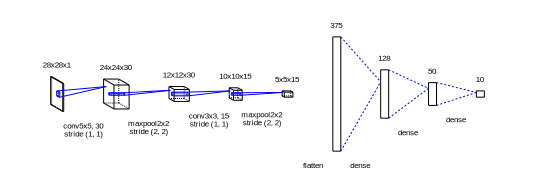

In [10]:
show_svg()

#### Useful resources:

- Sequential model: https://keras.io/getting-started/sequential-model-guide/
- What is *Dropout*?: http://jmlr.org/papers/v15/srivastava14a.html

### Building the model:

In [98]:
# Build the model:
#model = Pimped_LeNet5()
model = Inception()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 1, 28, 28)    0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 64, 28, 28)   128         input_20[0][0]                   
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 64, 28, 28)   128         input_20[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 1, 28, 28)    0           input_20[0][0]                   
__________________________________________________________________________________________________
conv2d_99 

### Training the model:

In [99]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=300)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 340us/step - loss: 0.4560 - acc: 0.8743 - val_loss: 0.2674 - val_acc: 0.9241
Epoch 2/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.2558 - acc: 0.9273 - val_loss: 0.2096 - val_acc: 0.9417
Epoch 3/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.1876 - acc: 0.9475 - val_loss: 0.1488 - val_acc: 0.9600
Epoch 4/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.1305 - acc: 0.9634 - val_loss: 0.1113 - val_acc: 0.9692
Epoch 5/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0979 - acc: 0.9730 - val_loss: 0.0853 - val_acc: 0.9759
Epoch 6/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0791 - acc: 0.9785 - val_loss: 0.0709 - val_acc: 0.9797
Epoch 7/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0683 - acc: 0.9809 - val_loss: 0.

### Evaluating the results:

In [100]:
# Final evaluation of the model:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test score:', scores[0]) 
print('Test accuracy:', scores[1]) # The Inception module has 1% less accurracy than LeNet5 probably because of the high batch_size number

10000/10000 [==============================] - 2s 221us/step
Test score: 0.0533628042046912
Test accuracy: 0.9838


## Saving a model:

We will basically do two things:

1. Serialize the model into a JSON file, which will save the architecture of our model.
2. Serialize the weights into a HDF5 file, which will save all parameters of our model.

In [75]:
# Serialize model to JSON:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 (h5py needed):
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Loading a model:

We will basically do two things:

1. Load the model from a JSON file.
2. Load the weights from a HDF5 file.

In [35]:
# Load json and create model:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Evaluate loaded model:

In [36]:
# Evaluate loaded model on test data:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 105us/step
Test score: 0.005413765857300541
Test accuracy: 0.9984799962997436


#### Predicting from an image

Now that we have a model, how do we use it?

It is as simple as follows:

In [37]:
# Remembering that the first image from the training set is a 5:
print("OHE label: {}".format(y_train[0]))
print("So, the 0-9 label would be: {}".format(numpy.argmax(y_train[0])))
print()

# Let's now print a prediction:
print("Prediction of first image: {}".format(model.predict(X_train[0:1])))
print("So, the 0-9 prediction would be: {}".format(numpy.argmax(model.predict(X_train[0:1]))))
print()

OHE label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
So, the 0-9 label would be: 5

Prediction of first image: [[1.7515610e-14 4.0331744e-12 2.1945456e-14 1.5798241e-02 6.4063446e-14
  9.8420173e-01 1.6601519e-10 8.1031761e-12 4.1395111e-08 4.2859920e-09]]
So, the 0-9 prediction would be: 5



**Plot training**


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


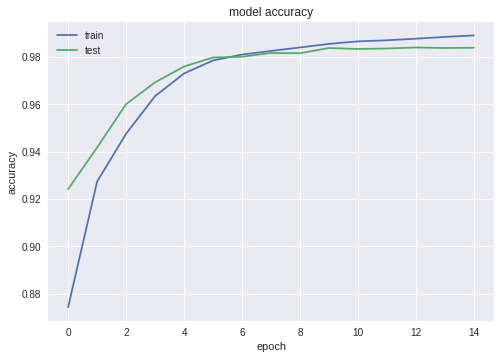

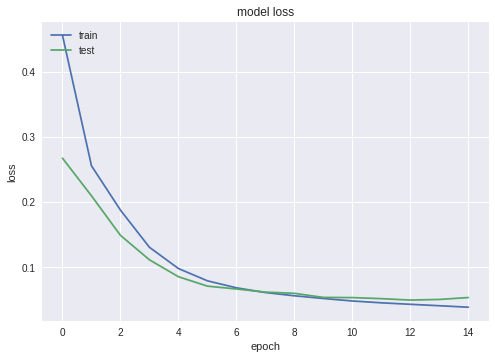

In [101]:
import matplotlib.pyplot as plt


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
